In [1]:
pip install PyMuPDF


Note: you may need to restart the kernel to use updated packages.


In [1]:
import fitz  # PyMuPDF
import pandas as pd

def extract_text(pdf_path):
    pdf_document = fitz.open(pdf_path)
    text = ""
    for page_number in range(pdf_document.page_count):
        page = pdf_document.load_page(page_number)
        text += page.get_text()
    pdf_document.close()
    return text

# Using a raw string for the file path
pdf_path = r"C:\Users\Vinay\Desktop\RA\TR-Part E_Learning based Solution Techniques for Optimization in Logistics and Transportation Systems\Research Papers\All Combined\Combined PDF\Overall Combined File\All Research Papers Combined File.pdf"

# Extract text
text = extract_text(pdf_path)

# Split the text by lines and create a DataFrame
lines = text.split("\n")
df = pd.DataFrame({'text': lines})

# Save to CSV
csv_path = r"C:\Users\Vinay\Desktop\RA\TR-Part E_Learning based Solution Techniques for Optimization in Logistics and Transportation Systems\Research Papers\All Combined\Combined PDF\Overall Combined File\Extracted_Text.csv"
df.to_csv(csv_path, index=False)


In [2]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import numpy as np
import nltk

# Initialize the stemmer.
np.random.seed(2018)
nltk.download('wordnet')
stemmer = SnowballStemmer("english")

# Load the data from the CSV file
# Please change the path to the location of your CSV file
data = pd.read_csv(r"C:\Users\Vinay\Desktop\RA\TR-Part E_Learning based Solution Techniques for Optimization in Logistics and Transportation Systems\Research Papers\All Combined\Combined PDF\Overall Combined File\Extracted_Text.csv")
data_text = data[['text']]  # assuming your CSV has a column named 'text' with the content
data_text['index'] = data_text.index

# Check for NaN and convert all text data to string
data_text = data_text.fillna('')  # fill NaN with empty string
data_text['text'] = data_text['text'].astype(str)  # convert all text data to string

documents = data_text

# Functions for preprocessing
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

# Preprocess the text
processed_docs = documents['text'].map(preprocess)  # change 'headline_text' to 'text' or the appropriate column name

# Create a dictionary reporting how many times a word appears in the training set.
dictionary = gensim.corpora.Dictionary(processed_docs)

# Filter out tokens that appear in
# less than 15 documents (absolute number) or
# more than 0.5 documents (fraction of total corpus size, not absolute number).
# after the above two steps, keep only the first 100000 most frequent tokens.
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# For each document, create a dictionary reporting how many words and how many times those words appear.
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train LDA model.
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

# Display topics and words
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic: 0 
Words: 0.064*"method" + 0.032*"propos" + 0.032*"improv" + 0.028*"select" + 0.025*"model" + 0.025*"base" + 0.021*"fuzzi" + 0.020*"algorithm" + 0.020*"simul" + 0.016*"appli"
Topic: 1 
Words: 0.105*"time" + 0.029*"number" + 0.029*"custom" + 0.024*"vehicl" + 0.021*"real" + 0.020*"product" + 0.017*"demand" + 0.016*"travel" + 0.016*"servic" + 0.016*"deliveri"
Topic: 2 
Words: 0.061*"algorithm" + 0.047*"learn" + 0.035*"perform" + 0.033*"result" + 0.025*"deep" + 0.025*"base" + 0.023*"tabl" + 0.019*"present" + 0.018*"heurist" + 0.018*"compar"
Topic: 3 
Words: 0.076*"transport" + 0.068*"network" + 0.044*"studi" + 0.026*"blockchain" + 0.026*"neural" + 0.021*"review" + 0.021*"logist" + 0.019*"research" + 0.017*"model" + 0.017*"design"
Topic: 4 
Words: 0.047*"decis" + 0.023*"constraint" + 0.020*"limit" + 0.018*"supplier" + 0.018*"support" + 0.016*"make" + 0.016*"need" + 0.015*"energi" + 0.014*"year" + 0.014*"data"
Topic: 5 
Words: 0.049*"comput" + 0.045*"oper" + 0.032*"intellig" + 0.031*"

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic: 0 
Words: 0.065*"method" + 0.033*"improv" + 0.030*"propos" + 0.029*"select" + 0.024*"model" + 0.022*"fuzzi" + 0.021*"algorithm" + 0.020*"simul" + 0.020*"base" + 0.018*"appli"
Topic: 1 
Words: 0.106*"time" + 0.029*"number" + 0.029*"custom" + 0.024*"vehicl" + 0.021*"real" + 0.018*"product" + 0.017*"demand" + 0.016*"travel" + 0.016*"deliveri" + 0.016*"servic"
Topic: 2 
Words: 0.060*"algorithm" + 0.046*"learn" + 0.034*"perform" + 0.033*"result" + 0.032*"base" + 0.025*"deep" + 0.023*"tabl" + 0.018*"present" + 0.018*"heurist" + 0.017*"compar"
Topic: 3 
Words: 0.074*"transport" + 0.067*"network" + 0.043*"studi" + 0.031*"blockchain" + 0.025*"neural" + 0.022*"logist" + 0.021*"review" + 0.019*"research" + 0.016*"design" + 0.015*"model"
Topic: 4 
Words: 0.047*"decis" + 0.023*"constraint" + 0.020*"limit" + 0.018*"supplier" + 0.018*"support" + 0.017*"data" + 0.016*"make" + 0.015*"need" + 0.015*"energi" + 0.014*"year"
Topic: 5 
Words: 0.050*"comput" + 0.046*"oper" + 0.032*"intellig" + 0.031*"

C:\Users\Vinay\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


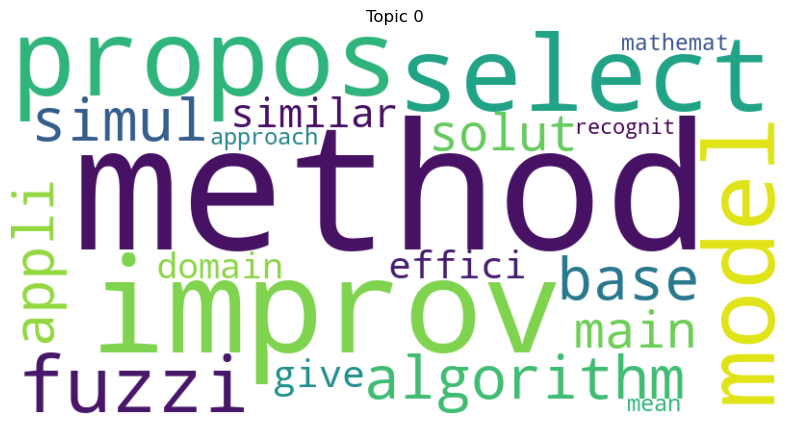

C:\Users\Vinay\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


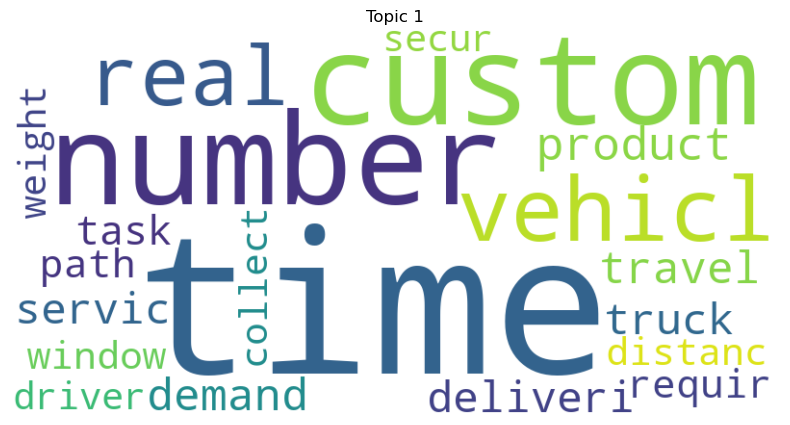

C:\Users\Vinay\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


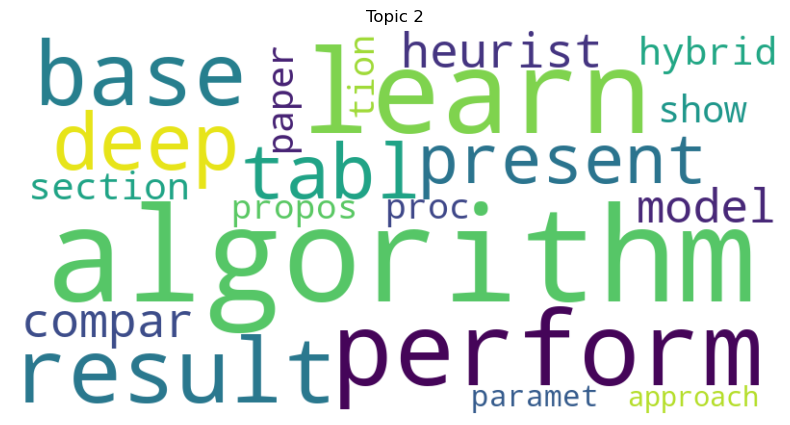

C:\Users\Vinay\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


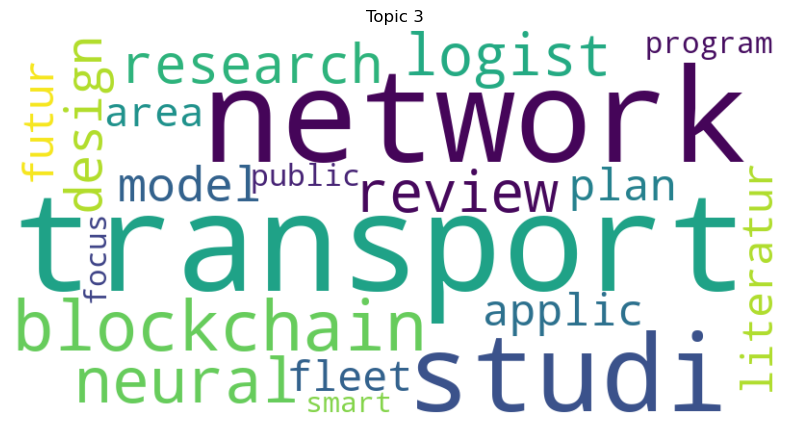

C:\Users\Vinay\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


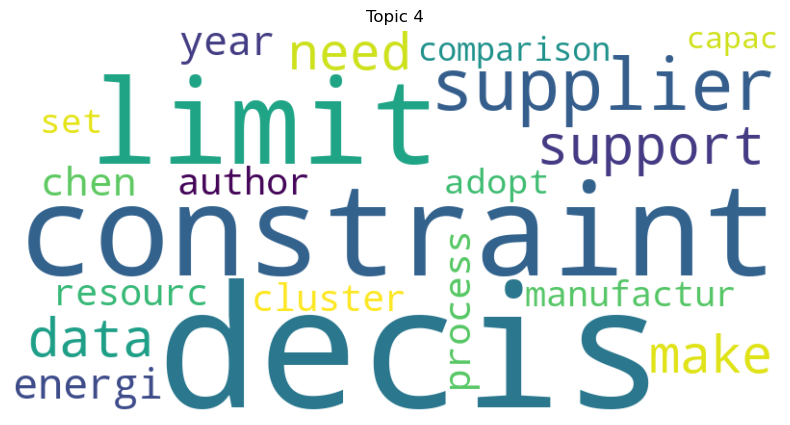

C:\Users\Vinay\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


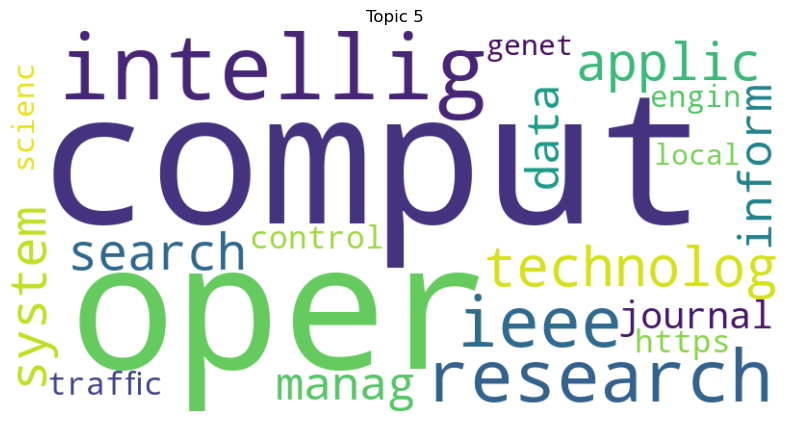

C:\Users\Vinay\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


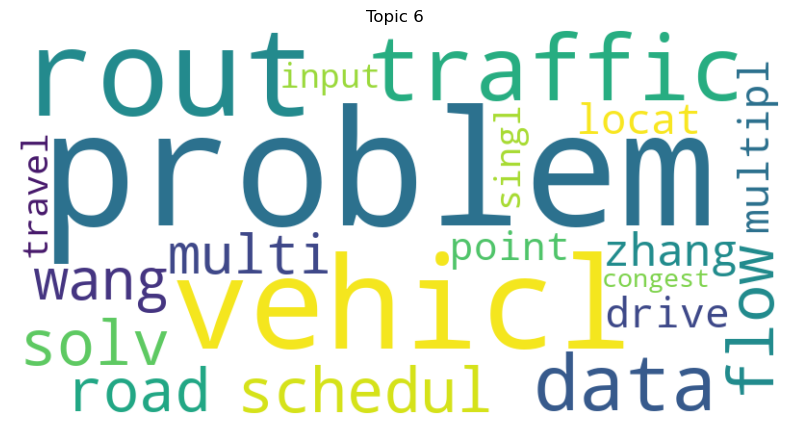

C:\Users\Vinay\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


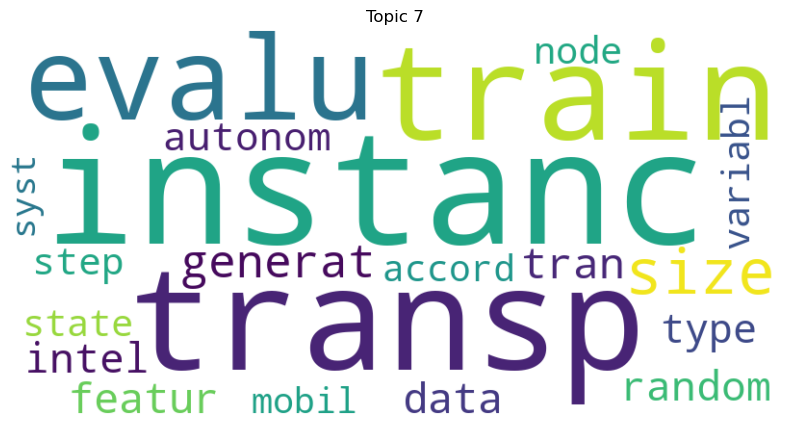

C:\Users\Vinay\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


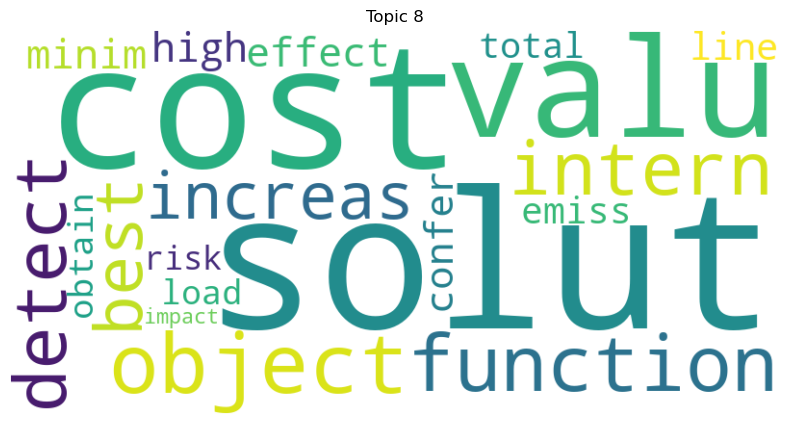

C:\Users\Vinay\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


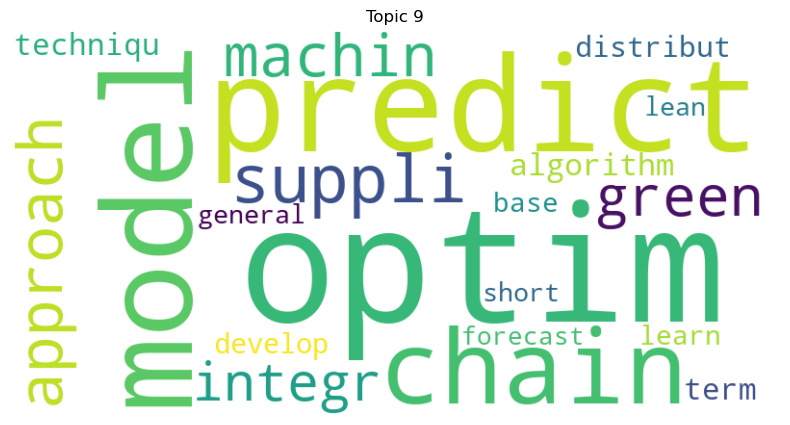

NameError: name 'top_category_per_year' is not defined

<Figure size 1800x700 with 0 Axes>

In [3]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import numpy as np
import nltk
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from gensim.models import CoherenceModel

# Initialize the stemmer.
np.random.seed(2018)
nltk.download('wordnet')
stemmer = SnowballStemmer("english")

# Load the data from the CSV file
data = pd.read_csv(r"C:\Users\Vinay\Desktop\RA\TR-Part E_Learning based Solution Techniques for Optimization in Logistics and Transportation Systems\Research Papers\All Combined\Combined PDF\Overall Combined File\Extracted_Text.csv")
data_text = data[['text']]  # assuming your CSV has a column named 'text' with the content
data_text['index'] = data_text.index

# Check for NaN and convert all text data to string
data_text = data_text.fillna('')  # fill NaN with an empty string
data_text['text'] = data_text['text'].astype(str)  # convert all text data to string

documents = data_text

# Functions for preprocessing
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

# Preprocess the text
processed_docs = documents['text'].map(preprocess)  # change 'headline_text' to 'text' or the appropriate column name

# Create a dictionary reporting how many times a word appears in the training set.
dictionary = gensim.corpora.Dictionary(processed_docs)

# Filter out tokens that appear in
# less than 15 documents (absolute number) or
# more than 0.5 documents (fraction of the total corpus size, not absolute number).
# After the above two steps, keep only the first 100,000 most frequent tokens.
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# For each document, create a dictionary reporting how many words and how many times those words appear.
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train LDA model.
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

# Display topics and words
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

# Compute Coherence Score for the LDA model
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

# Visualize topics using pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary=lda_model.id2word)
pyLDAvis.display(vis)

# Create a Word Cloud for each topic
topics = lda_model.show_topics(num_topics=10, num_words=20, formatted=False)
for topic_id, words in topics:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id}')
    plt.axis("off")
    plt.show()

# Plotting the top categories per year with adjusted settings for bar width and using the "tab10" color palette
plt.figure(figsize=(18, 7))
sns.barplot(x='Year', y='Count', hue='Category', data=top_category_per_year, palette=color_palette, dodge=False, linewidth=1.5, edgecolor='black')
plt.title('Most Popular Categories by Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
